# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [3]:
#pip install seaborn

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

df = pd.read_csv('df_mau.csv')
df

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_F,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,0,...,1,0,0,0,0,1,0,0,0,0
1,0,52.356164,8.358904,1,0,1,1,1.0,False,1,...,0,0,1,0,0,1,0,0,0,0
2,0,52.356164,8.358904,1,0,1,1,1.0,False,1,...,0,0,1,0,0,1,0,0,0,0
3,0,46.224658,2.106849,1,1,1,1,2.0,False,0,...,1,0,0,0,0,1,0,0,0,0
4,0,29.230137,3.021918,1,0,0,0,2.0,False,1,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,0,54.109589,9.884932,1,0,0,0,2.0,True,1,...,0,0,0,0,0,1,0,0,0,0
16646,0,43.389041,7.380822,1,1,1,0,2.0,True,1,...,1,0,0,0,0,1,0,0,0,0
16647,0,30.005479,9.800000,1,1,0,0,2.0,True,0,...,1,0,0,0,0,1,0,0,0,0
16648,0,30.005479,9.800000,1,1,0,0,2.0,True,0,...,1,0,0,0,0,1,0,0,0,0


In [5]:
# Dividindo o DataFrame entre variável target (mau) e variáveis explicativas (todas outras)
y = df.mau
X = df.drop('mau', axis=1)

In [6]:
X.head()

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,sexo_F,sexo_M,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,0,1,...,1,0,0,0,0,1,0,0,0,0
1,0,52.356164,8.358904,1,0,1,1,1.0,1,0,...,0,0,1,0,0,1,0,0,0,0
2,0,52.356164,8.358904,1,0,1,1,1.0,1,0,...,0,0,1,0,0,1,0,0,0,0
3,0,46.224658,2.106849,1,1,1,1,2.0,0,1,...,1,0,0,0,0,1,0,0,0,0
4,0,29.230137,3.021918,1,0,0,0,2.0,1,0,...,1,0,0,0,0,1,0,0,0,0


In [7]:
y

0        False
1        False
2        False
3        False
4        False
         ...  
16645     True
16646     True
16647     True
16648     True
16649     True
Name: mau, Length: 16650, dtype: bool

In [8]:
# Divisão do DataFrame entre dados para teste e dados para treino, sendo 70% e 30% respectivamente

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [27]:
tree = DecisionTreeClassifier(random_state=1) # Criando objeto tree para ser a arvore de decisão
tree = tree.fit(X_train, y_train) # Treinando com os dados separados para treino
y_predict_train = tree.predict(X_train) # Fazendo a previsão dos resultados
y_predict_train

array([False, False, False, ..., False, False, False])

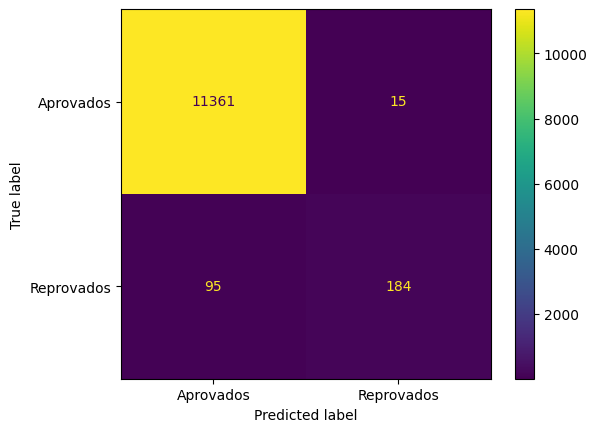

In [28]:
cm = confusion_matrix(y_train, y_predict_train)
cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])
cm_plot.plot()

In [29]:
accuracy_score(y_train, y_predict_train)

0.9905619905619906

<function matplotlib.pyplot.show(close=None, block=None)>

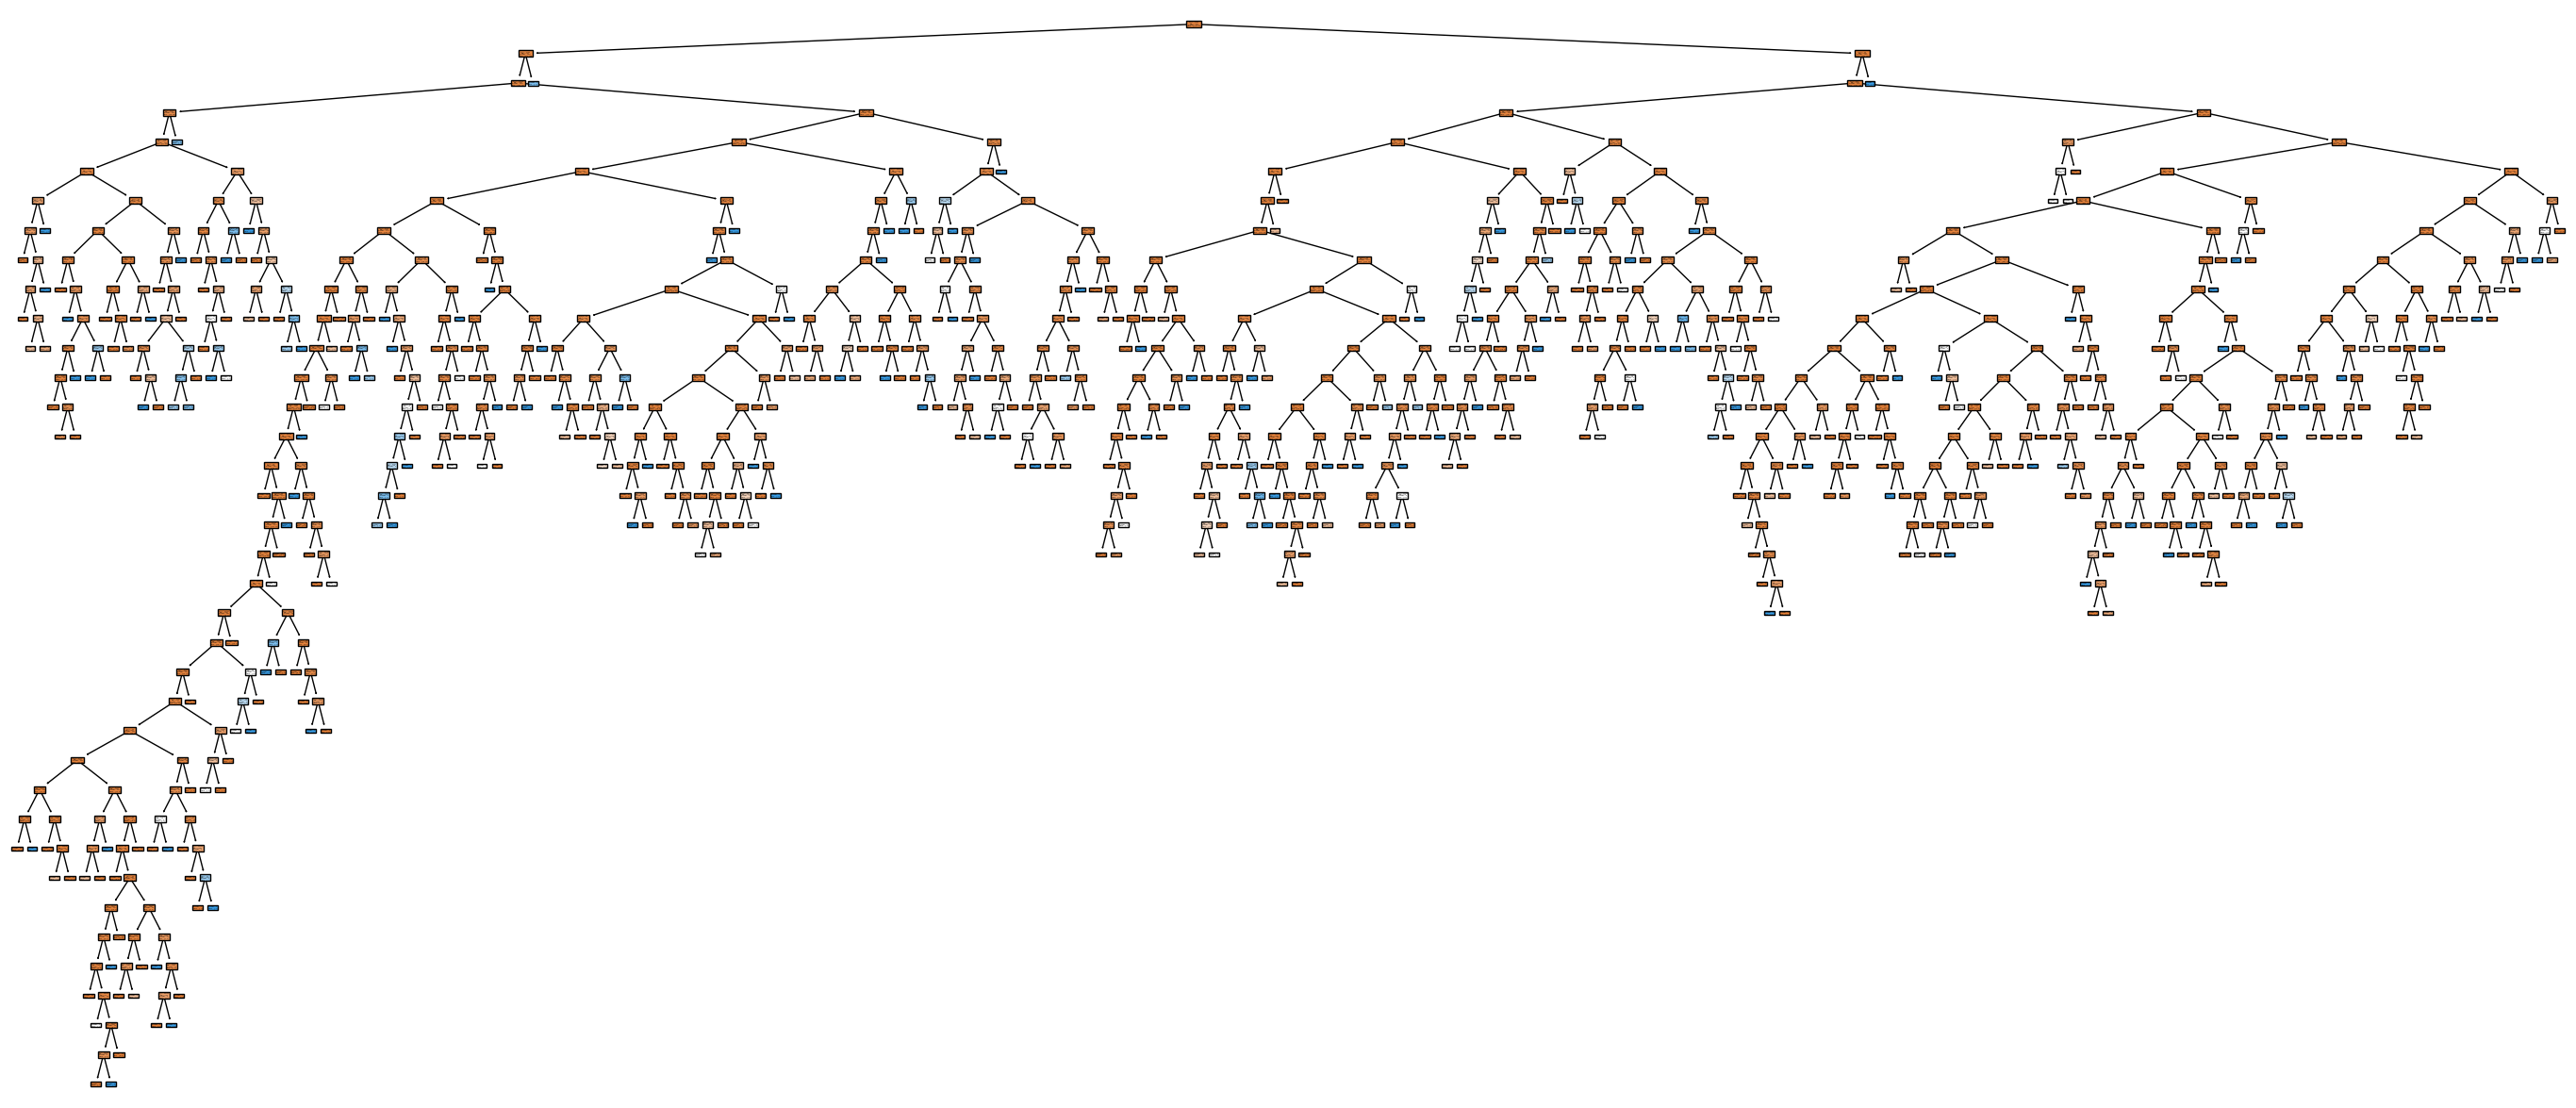

In [12]:
plt.figure(figsize=(35, 15))
plot_tree(tree, filled=True)
plt.show

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [23]:
y_predict_test = tree.predict(X_test) # Fazendo a previsão dos resultados
y_predict_test

array([False, False, False, ..., False, False, False])

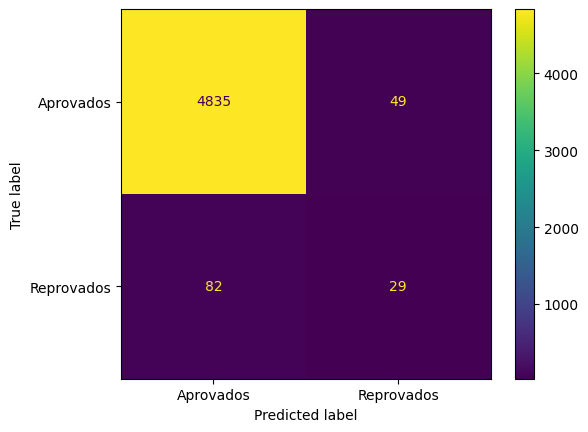

In [25]:
cm = confusion_matrix(y_test, y_predict_test)
cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])
cm_plot.plot()

In [24]:
accuracy_score(y_test, y_predict_test)

0.9737737737737737

In [33]:
# Declarando a nova arvore de decisão

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
tree_pruned = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
tree_pruned = tree_pruned.fit(X_train, y_train)
y_predict_test = tree_pruned.predict(X_test)
y_predict_test

array([False, False, False, ..., False, False, False])

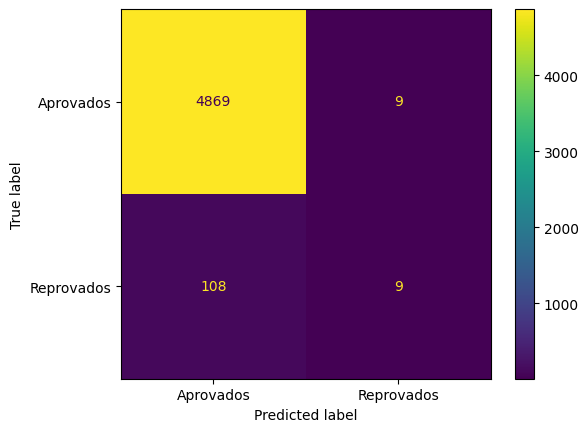

In [34]:
cm = confusion_matrix(y_test, y_predict_test)
cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])
cm_plot.plot()

In [35]:
accuracy_score(y_test, y_predict_test)

0.9765765765765766

Se todos clientes fossem classificados como bons, a acuracia seria até melhor na base de testes, sendo o resultado 99,63%. Isso acontece porque o número de erros de pessoas que foram classificadas como reprovados, mas deveriam ser classificadas como aprovados é de 108, enquanto o contrário que são pessoas que eram pra ser classificadas como reprovadas e foram classificadas como aprovadas é de 9. Sendo assim o número de erros diminuiu de 117 para 18.

Tirando a conclusão de que não é o modelo de ML ideal para esse caso, seria necessário fazer mais alterações para melhor ajuste ou até uma base de dados maior para poder analisar com mais informações.

In [36]:
tudo_bom = (((4869+9+9+108)-(9+9))*100)/(4869+9+9+108)
tudo_bom

99.63963963963964